# Transcriptional Frontloading
Following Barshis et al 2010, Gurr et al 2022, and Collins et al 2020

### general pipeline:
1. identify stress-inducible genes in control/naive oysters (uniquely DE in CS vs. CC, where S is a stressor)
    - separate up- and down-regulated DEGs
2. calculate mean vst expression for each treatment combo (CC, CS, SC, SS)
3. calculate baseline frontloading - "control ratio" - (SC / CC) with vst counts (y-axis)
4. calculate ratio of stress response - "response ratio" - ( (SS / SC) / CS / CC) ) with vst counts (x-axis)
5. plot!

## data prep:

### 1. load libraries

In [2]:
library(tidyverse)
library(cowplot)

### 2. read CSVs

#### DEGs

In [3]:
# get list of files
files <- list.files(
    path = '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase2_v_phase2/deseq_res_files/DEGs',
    pattern = '\\.csv$',
    full.names = TRUE
    )

# read each csv
deg_list <- lapply(files, read.csv)

# name list elements after the files
names(deg_list) <- gsub('DEG_','',tools::file_path_sans_ext(basename(files)))

# check things worked
names(deg_list)
head(deg_list$bb_cc)

[1] "bb_cc" "bc_bb" "bc_cc" "bc_hc" "bc_wc" "bh_ch" "bh_hh" "bw_cw" "bw_ww"
[10] "cb_bb" "cb_bc" "cb_cc" "cb_ch" "cb_cw" "ch_cc" "ch_hc" "cw_cc" "cw_ch"
[19] "cw_wc" "hb_bb" "hb_bh" "hb_cb" "hc_cc" "hc_hh" "hh_cc" "hh_ch" "wb_bb"
[28] "wb_bw" "wb_cb" "wc_cc" "wc_hc" "wc_ww" "wh_hw" "ww_cc" "ww_cw"

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,svalue,B1_B1_O01,B1_W5_O50,⋯,W5_C4_G45,W5_H4_G46,W5_W2_G22,W6_B3_G35,W6_B4_G48,W6_H6_G71,W6_W3_G36,W6_W4_G48,pair,DEG_group
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,LOC111134671,625.01171,1.753537,1.7854969,-3.896541,9.757625e-05,0.024809138,0.129437417,1630.363493,396.72563,⋯,343.310528,47.154920,18.39813,182.5864,1589.761857,113.04282,34.431967,365.533797,CC vs. BB,BB
2,LOC111120923,150.61422,-4.437657,4.2249639,3.936072,8.282599e-05,0.022257298,0.114534769,10.312823,5059.99177,⋯,184.094051,9.029665,0.00000,401.0569,185.203805,39.89747,5.379995,9.563384,CC vs. BB,CC
3,LOC111136853,88.45293,-1.689220,2.4561034,3.707079,2.096634e-04,0.041250020,0.227646483,2.812588,216.75736,⋯,3.731636,16.052739,0.00000,0.0000,6.902005,17.73221,2.151998,21.251965,CC vs. BB,CC
4,LOC111120760,106.14900,2.650952,0.8725114,-4.677419,2.905087e-06,0.001454877,0.006079963,62.814465,34.80049,⋯,31.096968,91.299951,198.69983,103.4305,81.673728,44.33052,40.887961,86.070458,CC vs. BB,BB
5,LOC111107221,5.76896,17.541870,4.0010929,-4.971174,6.654857e-07,0.000366605,0.001639387,0.000000,0.00000,⋯,0.000000,0.000000,0.00000,0.0000,0.000000,0.00000,0.000000,0.000000,CC vs. BB,BB
6,LOC111125595,126.64678,15.441532,9.9678950,-4.160631,3.173698e-05,0.011188080,0.039860365,493.140424,0.00000,⋯,0.000000,0.000000,0.00000,0.0000,0.000000,0.00000,0.000000,0.000000,CC vs. BB,BB


#### all genes

In [4]:
# get list of files
files_all <- list.files(
    path = '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase2_v_phase2/deseq_res_files/all_genes',
    pattern = '\\.csv$',
    full.names = TRUE
    )

# read each csv
all_list <- lapply(files_all, read.csv)

# name list elements after the files
names(all_list) <- tools::file_path_sans_ext(basename(files_all))

# check things worked
names(all_list)
head(all_list$bb_cc)

[1] "bb_cc" "bc_bb" "bc_cc" "bc_hc" "bc_wc" "bh_ch" "bh_hh" "bw_cw" "bw_ww"
[10] "cb_bb" "cb_bc" "cb_cc" "cb_ch" "cb_cw" "ch_cc" "ch_hc" "cw_cc" "cw_ch"
[19] "cw_wc" "hb_bb" "hb_bh" "hb_cb" "hc_cc" "hc_hh" "hh_cc" "hh_ch" "wb_bb"
[28] "wb_bw" "wb_cb" "wc_cc" "wc_hc" "wc_ww" "wh_hw" "ww_cc" "ww_cw"

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,svalue,B1_B1_O01,B1_W5_O50,⋯,W4_W5_G56,W5_B2_G21,W5_C4_G45,W5_H4_G46,W5_W2_G22,W6_B3_G35,W6_B4_G48,W6_H6_G71,W6_W3_G36,W6_W4_G48
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,LOC111116054,9.0629842,-0.0259479758,0.1402977,1.25567421,0.20923411,0.8319315,0.9732181,1.875059,5.965799,⋯,4.336105,2.452846,11.19491,2.006592,7.359253,5.277065,2.300668,21.05700,1.075999,0.0000
2,LOC111126949,539.2853993,0.0449490919,0.1165042,-1.33937885,0.18044737,0.8099303,0.9884593,829.713451,474.281013,⋯,230.897604,544.531781,506.25864,742.439160,650.373981,428.497663,480.839693,469.90350,302.355713,636.4963
3,LOC111110729,114.0070007,-0.0410675894,0.1029589,1.00110678,0.31677519,0.8906606,0.9913654,60.001877,92.469883,⋯,128.999131,62.138762,87.07151,149.491128,111.308701,121.372491,144.942108,119.69240,136.651870,226.3334
4,LOC111112434,6.9517032,0.0065767034,0.1296686,-0.41782612,0.67607425,0.9810808,0.9854003,10.312823,1.988600,⋯,6.504158,0.000000,13.68267,6.019777,3.679626,0.000000,2.300668,17.73221,8.607992,0.0000
5,LOC111120752,429.0263780,-0.0928699742,0.1371736,2.16428698,0.03044233,0.5232864,0.9843004,337.510556,334.084739,⋯,421.686235,286.165350,446.55246,346.137176,402.919100,293.404804,330.145914,461.03739,358.307660,456.9172
6,LOC111128944,0.1088474,0.0002295948,0.3710452,-0.01360725,0.98914332,NA,0.9712555,0.000000,0.000000,⋯,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000


#### vst counts

In [5]:
vsd <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase2_v_phase2/deseq_rawLFC/deseq_vstCounts.csv') %>%
column_to_rownames('X')
head(vsd)

,B1_B1_O01,B1_W5_O50,B2_B5_O51,B2_C4_O40,B3_B4_O41,B3_C3_O30,B3_C6_O66,B3_H4_O41,B3_W1_O06,B3_W4_O41,⋯,W4_W5_G56,W5_B2_G21,W5_C4_G45,W5_H4_G46,W5_W2_G22,W6_B3_G35,W6_B4_G48,W6_H6_G71,W6_W3_G36,W6_W4_G48
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LOC111116054,7.692872,7.805746,7.871959,7.843091,7.548551,7.909124,7.947895,7.869635,7.840134,7.758281,⋯,7.767900,7.713596,7.900466,7.697844,7.834121,7.790482,7.708399,8.030152,7.657898,7.548551
LOC111126949,10.197580,9.653169,9.900281,9.718856,9.612738,9.545333,9.334530,9.803992,9.906070,9.592360,⋯,9.078093,9.779869,9.712370,10.082883,9.950378,9.563392,9.665533,9.644851,9.276775,9.929224
LOC111110729,8.354765,8.542687,8.351593,8.513945,8.518601,8.653091,8.816678,8.937210,8.568640,8.590933,⋯,8.714150,8.368627,8.514299,8.798284,8.635108,8.680883,8.780214,8.673395,8.746416,9.064164
LOC111112434,7.886383,7.697174,7.548551,7.687586,7.940109,7.989592,7.818256,8.186828,7.658920,7.879728,⋯,7.817069,7.548551,7.937395,7.806904,7.750644,7.548551,7.708399,7.990820,7.857315,7.548551
LOC111120752,9.363550,9.355360,9.509373,9.284512,9.198871,9.337765,9.699834,9.473806,8.989457,9.167603,⋯,9.549481,9.234610,9.599548,9.383933,9.510347,9.253648,9.345876,9.627837,9.412129,9.619853
LOC111128944,7.548551,7.548551,7.548551,7.548551,7.548551,7.548551,7.548551,7.548551,7.548551,7.548551,⋯,7.548551,7.548551,7.548551,7.548551,7.548551,7.548551,7.548551,7.548551,7.548551,7.548551


this is for individual samples, so will need to average across sample

## frontloading analysis

### 1. stress-inducible genes
genes uniquely DE in phase 1 control/naive oysters

for hypoxia, these are DEGs in CH vs. CC (and not in HH vs. HC)

In [6]:
## HYPOXIA
hyp.uniq <- deg_list$ch_cc[!deg_list$ch_cc$Gene %in% deg_list$hh_hc$Gene, ]
dim(hyp.uniq) # 203 unique DEGs

# upregulated genes
hyp.uniq_UP <- hyp.uniq %>% filter(log2FoldChange > 0)
dim(hyp.uniq_UP) # 62 upregulated

# downregulated genes
hyp.uniq_DOWN <- hyp.uniq %>% filter(log2FoldChange < 0)
dim(hyp.uniq_DOWN) # 141 downregulated

[1] 203 104

[1]  62 104

[1] 141 104

In [7]:
head(hyp.uniq_DOWN)

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,svalue,B1_B1_O01,B1_W5_O50,⋯,W5_C4_G45,W5_H4_G46,W5_W2_G22,W6_B3_G35,W6_B4_G48,W6_H6_G71,W6_W3_G36,W6_W4_G48,pair,DEG_group
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,LOC111119645,543.131588,-2.642393,3.092662,-3.791946,1.494712e-04,2.867316e-02,0.1239672568,1710.053485,27.84039,⋯,6.219394,187.616382,135.2263,8.443304,6.902005,16.62394,30.127971,46.754323,CC vs. CH,CC
2,LOC111116296,466.599152,-4.795858,3.894749,-3.966035,7.307828e-05,1.623679e-02,0.0632262942,0.000000,0.00000,⋯,2.487757,60.197770,0.0000,4.221652,103.530077,0.00000,0.000000,2.125196,CC vs. CH,CC
3,LOC111105495,3.174899,-18.451623,11.357256,-4.070549,4.690239e-05,1.114403e-02,0.0278721628,0.000000,0.00000,⋯,4.975515,0.000000,0.0000,0.000000,0.000000,110.82630,0.000000,0.000000,CC vs. CH,CC
4,LOC111122352,2.183255,-16.084705,3.171951,-5.253215,1.494670e-07,6.172989e-05,0.0001460690,0.000000,0.00000,⋯,0.000000,7.023073,0.0000,2.110826,0.000000,0.00000,0.000000,2.125196,CC vs. CH,CC
5,LOC111123472,227.831737,-25.198248,5.210882,-5.189911,2.103947e-07,8.298770e-05,0.0002029509,0.000000,0.00000,⋯,603.281182,0.000000,0.0000,842.219545,0.000000,0.00000,0.000000,2.125196,CC vs. CH,CC
6,LOC111136853,88.452932,-6.204819,2.112541,-4.541727,5.579521e-06,1.733355e-03,0.0048374096,2.812588,216.75736,⋯,3.731636,16.052739,0.0000,0.000000,6.902005,17.73221,2.151998,21.251965,CC vs. CH,CC


In [8]:
## WARM
warm.uniq <- deg_list$cw_cc[!deg_list$cw_cc$Gene %in% deg_list$ww_wc$Gene, ]
dim(warm.uniq) # 135 unique DEGs

# upregulated genes
warm.uniq_UP <- warm.uniq %>% filter(log2FoldChange > 0)
dim(warm.uniq_UP) # 62 upregulated

# downregulated genes
warm.uniq_DOWN <- warm.uniq %>% filter(log2FoldChange < 0)
dim(warm.uniq_DOWN) # 73 downregulated

[1] 135 104

[1]  62 104

[1]  73 104

In [9]:
## BOTH
both.uniq <- deg_list$cb_cc[!deg_list$cb_cc$Gene %in% deg_list$bb_bc$Gene, ]
dim(both.uniq) # 199 unique DEGs

# upregulated genes
both.uniq_UP <- both.uniq %>% filter(log2FoldChange > 0)
dim(both.uniq_UP) # 74 upregulated

# downregulated genes
both.uniq_DOWN <- both.uniq %>% filter(log2FoldChange < 0)
dim(both.uniq_DOWN) # 125 downregulated

[1] 199 104

[1]  74 104

[1] 125 104

### 2. calculate mean vst expression for each treatment combo


In [10]:
metaData <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/sample_metaData.csv') %>%
mutate(All_treatment = factor(paste0(Phase1_treatment, '_', Phase2_treatment))) %>% # add column for p1 and p2 treatment combined, make treatment groups a factor
filter(!is.na(Phase2_treatment)) %>% # remove phase 1 samples
select(Sample, All_treatment) # grab only the needed columns 

dim(metaData)
head(metaData)

[1] 96  2

,Sample,All_treatment
,<chr>,<fct>
1,B1_B1_O01,both_both
2,B1_W5_O50,both_warm
3,B2_B5_O51,both_both
4,B2_C4_O40,both_control
5,B3_B4_O41,both_both
6,B3_C3_O30,both_control


In [11]:
# convert vsd to long format
vsd.df <- as.data.frame(vsd)            # convert matrix to data frame
vsd.df$Gene <- rownames(vsd.df)            # keep gene names as a column

# Convert to long format
vsd_long <- vsd.df %>%
  pivot_longer(
    cols = -Gene,            # all columns except Gene
    names_to = "Sample",     # name of the column for sample names
    values_to = "Expression" # name of the column for values
  )

head(vsd_long)

Gene,Sample,Expression
<chr>,<chr>,<dbl>
LOC111116054,B1_B1_O01,7.692872
LOC111116054,B1_W5_O50,7.805746
LOC111116054,B2_B5_O51,7.871959
LOC111116054,B2_C4_O40,7.843091
LOC111116054,B3_B4_O41,7.548551
LOC111116054,B3_C3_O30,7.909124


In [12]:
meta_vsd <- merge(vsd_long, metaData, by = 'Sample')
head(meta_vsd)

,Sample,Gene,Expression,All_treatment
,<chr>,<chr>,<dbl>,<fct>
1,B1_B1_O01,LOC111116054,7.692872,both_both
2,B1_B1_O01,LOC111100350,8.035853,both_both
3,B1_B1_O01,LOC111132777,10.868664,both_both
4,B1_B1_O01,LOC111124849,8.653606,both_both
5,B1_B1_O01,LOC111133322,9.363550,both_both
6,B1_B1_O01,LOC111101451,9.885436,both_both


In [13]:
meanExpr.df <- meta_vsd %>%
group_by(Gene, All_treatment) %>%
select(-Sample) %>%
summarise(meanExp = mean(Expression))

vsd.mean.wide <- meanExpr.df %>%
  pivot_wider(
    names_from = All_treatment,   # column to spread out into multiple columns
    values_from = meanExp         # values to fill in the new columns
  )

head(vsd.mean.wide)

`summarise()` has grouped output by 'Gene'. You can override using the
`.groups` argument.


Gene,both_both,both_control,both_hypoxic,both_warm,control_both,control_control,control_hypoxic,control_warm,hypoxic_both,hypoxic_control,hypoxic_hypoxic,hypoxic_warm,warm_both,warm_control,warm_hypoxic,warm_warm
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ATP6,17.355019,17.423401,17.660084,17.16115,17.555781,17.424434,17.361858,17.418223,17.750023,17.314045,17.387645,17.284893,17.633064,17.526358,17.465512,17.494084
COX1,19.457291,19.343427,19.503614,19.37394,19.559019,19.423998,19.331708,19.479791,19.641115,19.392855,19.410430,19.338048,19.664400,19.572527,19.314625,19.383006
COX2,17.892262,17.859046,18.047449,17.82403,18.129142,17.932914,17.810160,18.023990,18.226151,17.661840,17.972358,17.817354,18.026465,18.106603,17.836206,17.921893
COX3,17.997259,17.926730,18.247554,17.81123,18.143858,18.112947,17.825103,18.028660,18.116634,17.788117,17.943627,17.842205,18.134723,18.252606,17.782529,18.002019
CYTB,19.346519,19.185643,19.011555,19.25967,19.339873,19.271750,18.957143,19.461710,19.553155,19.306429,19.182471,19.210896,19.470504,19.415899,18.989822,19.305645
LOC111099029,8.264371,8.317748,8.145354,8.27625,8.261235,8.185348,8.189334,8.516632,8.149731,8.127269,8.119988,8.219036,8.331937,8.014627,8.325518,8.305376


### 3. calculate baseline frontloading
"control ratio"

(HC / CC) with vst counts (y-axis)

In [14]:
# HYPOXIA
# pull out genes of interest

## UP
hyp.vsd_UP <- vsd.mean.wide[vsd.mean.wide$Gene %in% hyp.uniq_UP$Gene,]
dim(hyp.vsd_UP)

## DOWN
hyp.vsd_DOWN <- vsd.mean.wide[vsd.mean.wide$Gene %in% hyp.uniq_DOWN$Gene,]
head(hyp.vsd_DOWN)
dim(hyp.vsd_DOWN)

[1] 62 17

Gene,both_both,both_control,both_hypoxic,both_warm,control_both,control_control,control_hypoxic,control_warm,hypoxic_both,hypoxic_control,hypoxic_hypoxic,hypoxic_warm,warm_both,warm_control,warm_hypoxic,warm_warm
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LOC111099074,7.805260,7.548551,7.757305,7.752932,7.826500,7.798051,7.548551,7.548551,7.548551,7.548551,8.079243,8.092918,7.769407,7.718112,7.753605,7.548551
LOC111099482,7.889785,7.625013,7.914259,7.753096,7.786116,7.976518,7.565448,7.783568,8.170798,7.644881,7.961550,7.854053,7.640263,8.144236,7.645668,7.780035
LOC111099595,9.172203,7.994043,7.743234,8.139119,8.967058,8.631046,7.791387,7.909609,7.905191,8.915372,7.749611,7.941950,8.312422,9.048107,7.988189,7.746455
LOC111101171,8.407982,7.679593,7.771744,8.621809,7.700590,7.653490,7.548551,8.106542,7.749530,8.855159,7.728562,7.653435,8.964156,8.574650,8.092879,8.170686
LOC111101676,7.702917,7.666087,7.801857,7.601045,7.807869,7.625909,7.548551,7.722631,7.664101,7.548551,7.548551,8.436864,7.628413,7.757685,7.567046,8.313424
LOC111101747,8.291013,7.875128,8.219321,8.120626,8.205179,8.461735,7.779687,8.197467,7.894320,8.067042,8.352583,8.704643,8.302338,8.024420,8.037418,8.390000


[1] 141  17

In [15]:
## UP
hypUP.y <- (hyp.vsd_UP$hypoxic_control / hyp.vsd_UP$control_control)

## DOWN
hypDOWN.y <- (hyp.vsd_DOWN$hypoxic_control / hyp.vsd_DOWN$control_control)

(WC / CC) for y-axis

In [16]:
# WARMING
# pull out genes of interest

## UP
warm.vsd_UP <- vsd.mean.wide[vsd.mean.wide$Gene %in% warm.uniq_UP$Gene,]
dim(warm.vsd_UP)

## DOWN
warm.vsd_DOWN <- vsd.mean.wide[vsd.mean.wide$Gene %in% warm.uniq_DOWN$Gene,]
head(warm.vsd_DOWN)
dim(warm.vsd_DOWN)

[1] 62 17

Gene,both_both,both_control,both_hypoxic,both_warm,control_both,control_control,control_hypoxic,control_warm,hypoxic_both,hypoxic_control,hypoxic_hypoxic,hypoxic_warm,warm_both,warm_control,warm_hypoxic,warm_warm
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LOC111099074,7.805260,7.548551,7.757305,7.752932,7.826500,7.798051,7.548551,7.548551,7.548551,7.548551,8.079243,8.092918,7.769407,7.718112,7.753605,7.548551
LOC111099527,7.704861,7.548551,7.548551,7.548551,7.574300,7.649313,7.674472,7.548551,7.688578,7.592834,7.548551,7.573457,7.831779,7.706010,7.585515,7.620739
LOC111099559,7.565628,7.548551,7.715072,7.548551,7.903960,7.762877,7.649219,7.548551,7.673888,7.811164,7.616988,7.566028,7.565082,7.548551,7.655539,7.643282
LOC111099595,9.172203,7.994043,7.743234,8.139119,8.967058,8.631046,7.791387,7.909609,7.905191,8.915372,7.749611,7.941950,8.312422,9.048107,7.988189,7.746455
LOC111099673,7.548551,7.548551,7.873499,7.548551,8.543848,8.297562,7.865616,7.548551,8.531162,7.548551,7.824055,7.781554,8.027886,7.565766,7.847664,7.566843
LOC111099809,7.548551,7.622924,7.591953,7.566080,7.717848,7.564011,7.566926,7.548551,7.693279,7.624355,7.548551,7.548551,7.611536,7.583972,7.756502,7.548551


[1] 73 17

In [17]:
## WARMING
## UP
warmUP.y <- (warm.vsd_UP$warm_control / warm.vsd_UP$control_control)

## DOWN
warmDOWN.y <- (warm.vsd_DOWN$warm_control / warm.vsd_DOWN$control_control)

(BC / CC) for y-axis

In [18]:
# BOTH
# pull out genes of interest

## UP
both.vsd_UP <- vsd.mean.wide[vsd.mean.wide$Gene %in% both.uniq_UP$Gene,]
dim(both.vsd_UP)

## DOWN
both.vsd_DOWN <- vsd.mean.wide[vsd.mean.wide$Gene %in% both.uniq_DOWN$Gene,]
head(both.vsd_DOWN)
dim(both.vsd_DOWN)

[1] 74 17

Gene,both_both,both_control,both_hypoxic,both_warm,control_both,control_control,control_hypoxic,control_warm,hypoxic_both,hypoxic_control,hypoxic_hypoxic,hypoxic_warm,warm_both,warm_control,warm_hypoxic,warm_warm
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LOC111099726,8.916818,10.100852,8.789138,8.879179,7.808291,8.881925,9.043294,8.409737,7.832114,8.541053,8.558694,7.885546,7.891229,7.824548,8.521189,7.844034
LOC111099858,8.034315,8.146270,7.812627,7.847671,7.548551,7.751796,7.874816,7.743867,7.548551,7.595118,7.873834,7.622011,7.631095,7.684221,7.775934,7.609975
LOC111100024,7.669529,8.369059,8.168510,8.799905,7.686136,8.310178,9.311571,9.618512,8.951709,7.875539,9.020814,8.292345,7.765573,7.870044,7.872946,8.791578
LOC111100107,8.598504,7.586720,7.643622,7.583712,7.548551,8.065497,8.423885,7.788313,7.548551,8.613981,7.674672,7.602689,7.749120,8.266129,8.235204,8.299404
LOC111100157,8.010992,7.548551,7.650216,7.548551,7.548551,7.976154,7.595239,7.753849,7.661956,7.930981,7.548551,7.627040,7.742239,7.820845,7.548551,7.548551
LOC111100849,8.777888,8.227788,7.962783,8.039361,8.027815,8.855383,8.834237,8.355292,9.115170,8.255676,8.018564,8.293831,9.304861,8.601041,8.270059,8.358456


[1] 125  17

In [19]:
## BOTH
## UP
bothUP.y <- (both.vsd_UP$both_control / both.vsd_UP$control_control)

## DOWN
bothDOWN.y <- (both.vsd_DOWN$both_control / both.vsd_DOWN$control_control)

### 4. calculate ratio of stress response
"response ratio"

( (HH / HC) / CH / CC) ) with vst counts (x-axis)

In [20]:
## UP
hypUP.x <- ( (hyp.vsd_UP$hypoxic_hypoxic / hyp.vsd_UP$hypoxic_control ) / (hyp.vsd_UP$control_hypoxic / hyp.vsd_UP$control_control) )

## DOWN
hypDOWN.x <- ( (hyp.vsd_DOWN$hypoxic_hypoxic / hyp.vsd_DOWN$hypoxic_control ) / (hyp.vsd_DOWN$control_hypoxic / hyp.vsd_DOWN$control_control) )

In [21]:
## UP
hyp.vsd_UP$x.axis <- hypUP.x
hyp.vsd_UP$y.axis <- hypUP.y
head(hyp.vsd_UP)

## DOWN
hyp.vsd_DOWN$x.axis <- hypDOWN.x
hyp.vsd_DOWN$y.axis <- hypDOWN.y

Gene,both_both,both_control,both_hypoxic,both_warm,control_both,control_control,control_hypoxic,control_warm,hypoxic_both,hypoxic_control,hypoxic_hypoxic,hypoxic_warm,warm_both,warm_control,warm_hypoxic,warm_warm,x.axis,y.axis
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LOC111099607,7.991674,7.789446,7.656677,7.698604,7.623535,7.548551,7.578658,7.548551,7.586447,7.565438,7.777021,7.821754,7.781577,7.596480,7.682781,7.809746,1.0238833,1.002237
LOC111099630,7.805387,7.812291,7.548551,7.693140,7.592385,7.548551,7.755932,7.633338,7.602941,7.574142,7.548551,7.548551,7.548551,7.586940,7.548551,7.605701,0.9699732,1.003390
LOC111099906,7.611759,7.605742,7.812469,7.548551,7.565887,7.548551,7.625617,7.638993,7.662550,7.648729,7.568580,7.630847,7.692584,7.779650,7.574701,7.683434,0.9795209,1.013271
LOC111099988,7.548551,7.912971,7.548551,7.548551,8.215493,7.548551,7.732377,7.878452,7.875789,7.548551,7.720870,7.718074,7.803656,7.548551,7.548551,8.063644,0.9985118,1.000000
LOC111100493,7.859773,7.856655,7.621220,7.609093,7.762714,7.548551,7.585274,7.926831,7.902342,7.681128,7.908018,7.638422,8.146013,7.548551,7.645200,7.839452,1.0245541,1.017563
LOC111100764,7.567443,7.565631,7.622270,7.566040,7.591337,7.548551,7.598703,7.729568,7.572916,7.548551,7.620139,7.628851,7.574674,7.548551,7.573433,7.563110,1.0028211,1.000000


( (WW / WC) / CW / CC) ) with vst counts (x-axis)

In [22]:
## WARM
## UP
warmUP.x <- ( (warm.vsd_UP$warm_warm / warm.vsd_UP$warm_control ) / (warm.vsd_UP$control_warm / warm.vsd_UP$control_control) )

## DOWN
warmDOWN.x <- ( (warm.vsd_DOWN$warm_warm / warm.vsd_DOWN$warm_control ) / (warm.vsd_DOWN$control_warm / warm.vsd_DOWN$control_control) )

In [23]:
## WARM
## UP
warm.vsd_UP$x.axis <- warmUP.x
warm.vsd_UP$y.axis <- warmUP.y
head(warm.vsd_UP)

## DOWN
warm.vsd_DOWN$x.axis <- warmDOWN.x
warm.vsd_DOWN$y.axis <- warmDOWN.y

Gene,both_both,both_control,both_hypoxic,both_warm,control_both,control_control,control_hypoxic,control_warm,hypoxic_both,hypoxic_control,hypoxic_hypoxic,hypoxic_warm,warm_both,warm_control,warm_hypoxic,warm_warm,x.axis,y.axis
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LOC111099630,7.805387,7.812291,7.548551,7.693140,7.592385,7.548551,7.755932,7.633338,7.602941,7.574142,7.548551,7.548551,7.548551,7.586940,7.548551,7.605701,0.9913379,1.005086
LOC111099767,7.861312,7.600091,7.758817,7.582806,7.582946,7.662999,7.716579,8.062774,7.632628,7.593455,7.679751,7.661744,7.748449,7.781787,7.782770,7.823992,0.9555718,1.015502
LOC111099906,7.611759,7.605742,7.812469,7.548551,7.565887,7.548551,7.625617,7.638993,7.662550,7.648729,7.568580,7.630847,7.692584,7.779650,7.574701,7.683434,0.9759392,1.030615
LOC111099988,7.548551,7.912971,7.548551,7.548551,8.215493,7.548551,7.732377,7.878452,7.875789,7.548551,7.720870,7.718074,7.803656,7.548551,7.548551,8.063644,1.0235061,1.000000
LOC111100493,7.859773,7.856655,7.621220,7.609093,7.762714,7.548551,7.585274,7.926831,7.902342,7.681128,7.908018,7.638422,8.146013,7.548551,7.645200,7.839452,0.9889768,1.000000
LOC111100764,7.567443,7.565631,7.622270,7.566040,7.591337,7.548551,7.598703,7.729568,7.572916,7.548551,7.620139,7.628851,7.574674,7.548551,7.573433,7.563110,0.9784648,1.000000


( (BB / BC) / CB / CC) ) with vst counts (x-axis)

In [24]:
## BOTH
## UP
bothUP.x <- ( (both.vsd_UP$both_both / both.vsd_UP$both_control ) / (both.vsd_UP$control_both / both.vsd_UP$control_control) )

## DOWN
bothDOWN.x <- ( (both.vsd_DOWN$both_both / both.vsd_DOWN$both_control ) / (both.vsd_DOWN$control_both / both.vsd_DOWN$control_control) )

In [25]:
## BOTH
## UP
both.vsd_UP$x.axis <- bothUP.x
both.vsd_UP$y.axis <- bothUP.y
head(both.vsd_UP)

## DOWN
both.vsd_DOWN$x.axis <- bothDOWN.x
both.vsd_DOWN$y.axis <- bothDOWN.y

Gene,both_both,both_control,both_hypoxic,both_warm,control_both,control_control,control_hypoxic,control_warm,hypoxic_both,hypoxic_control,hypoxic_hypoxic,hypoxic_warm,warm_both,warm_control,warm_hypoxic,warm_warm,x.axis,y.axis
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LOC111099607,7.991674,7.789446,7.656677,7.698604,7.623535,7.548551,7.578658,7.548551,7.586447,7.565438,7.777021,7.821754,7.781577,7.596480,7.682781,7.809746,1.0158706,1.031913
LOC111099630,7.805387,7.812291,7.548551,7.693140,7.592385,7.548551,7.755932,7.633338,7.602941,7.574142,7.548551,7.548551,7.548551,7.586940,7.548551,7.605701,0.9933480,1.034939
LOC111099705,7.775457,7.766795,8.293153,7.952560,8.310634,7.758060,7.871320,7.867752,8.239216,7.737338,7.738343,8.053075,7.859741,7.815660,7.855499,7.770558,0.9345512,1.001126
LOC111099906,7.611759,7.605742,7.812469,7.548551,7.565887,7.548551,7.625617,7.638993,7.662550,7.648729,7.568580,7.630847,7.692584,7.779650,7.574701,7.683434,0.9984979,1.007576
LOC111099988,7.548551,7.912971,7.548551,7.548551,8.215493,7.548551,7.732377,7.878452,7.875789,7.548551,7.720870,7.718074,7.803656,7.548551,7.548551,8.063644,0.8765041,1.048277
LOC111100493,7.859773,7.856655,7.621220,7.609093,7.762714,7.548551,7.585274,7.926831,7.902342,7.681128,7.908018,7.638422,8.146013,7.548551,7.645200,7.839452,0.9727973,1.040816


### 5. plot!

#### HYPOXIA

In [26]:
hyp.UP.plot <- ggplot(hyp.vsd_UP, aes(x = x.axis, y = y.axis)) +
geom_point() + 
geom_smooth(method = "loess") +
geom_hline(yintercept = 1, color = 'grey') + 
geom_vline(xintercept = 1, color = 'grey') +
labs(x = 'hypoxia response ratio: ( (HH / HC) / (CH / CC) )',
     y = 'hypoxia control ratio: (HC / CC)',
    title = 'upregulation') + 
theme_classic(base_size = 15) +
theme(plot.title = element_text(hjust = .5)) 

In [27]:
hyp.DOWN.plot <- ggplot(hyp.vsd_DOWN, aes(x = x.axis, y = y.axis)) +
geom_point() + 
geom_smooth(method = 'loess') +
geom_hline(yintercept = 1, color = 'grey') + 
geom_vline(xintercept = 1, color = 'grey') +
labs(x = 'hypoxia response ratio: ( (HH / HC) / (CH / CC) )',
     y = 'hypoxia control ratio: (HC / CC)',
    title = 'downregulation') + 
theme_classic(base_size = 15) +
theme(plot.title = element_text(hjust = .5)) 

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


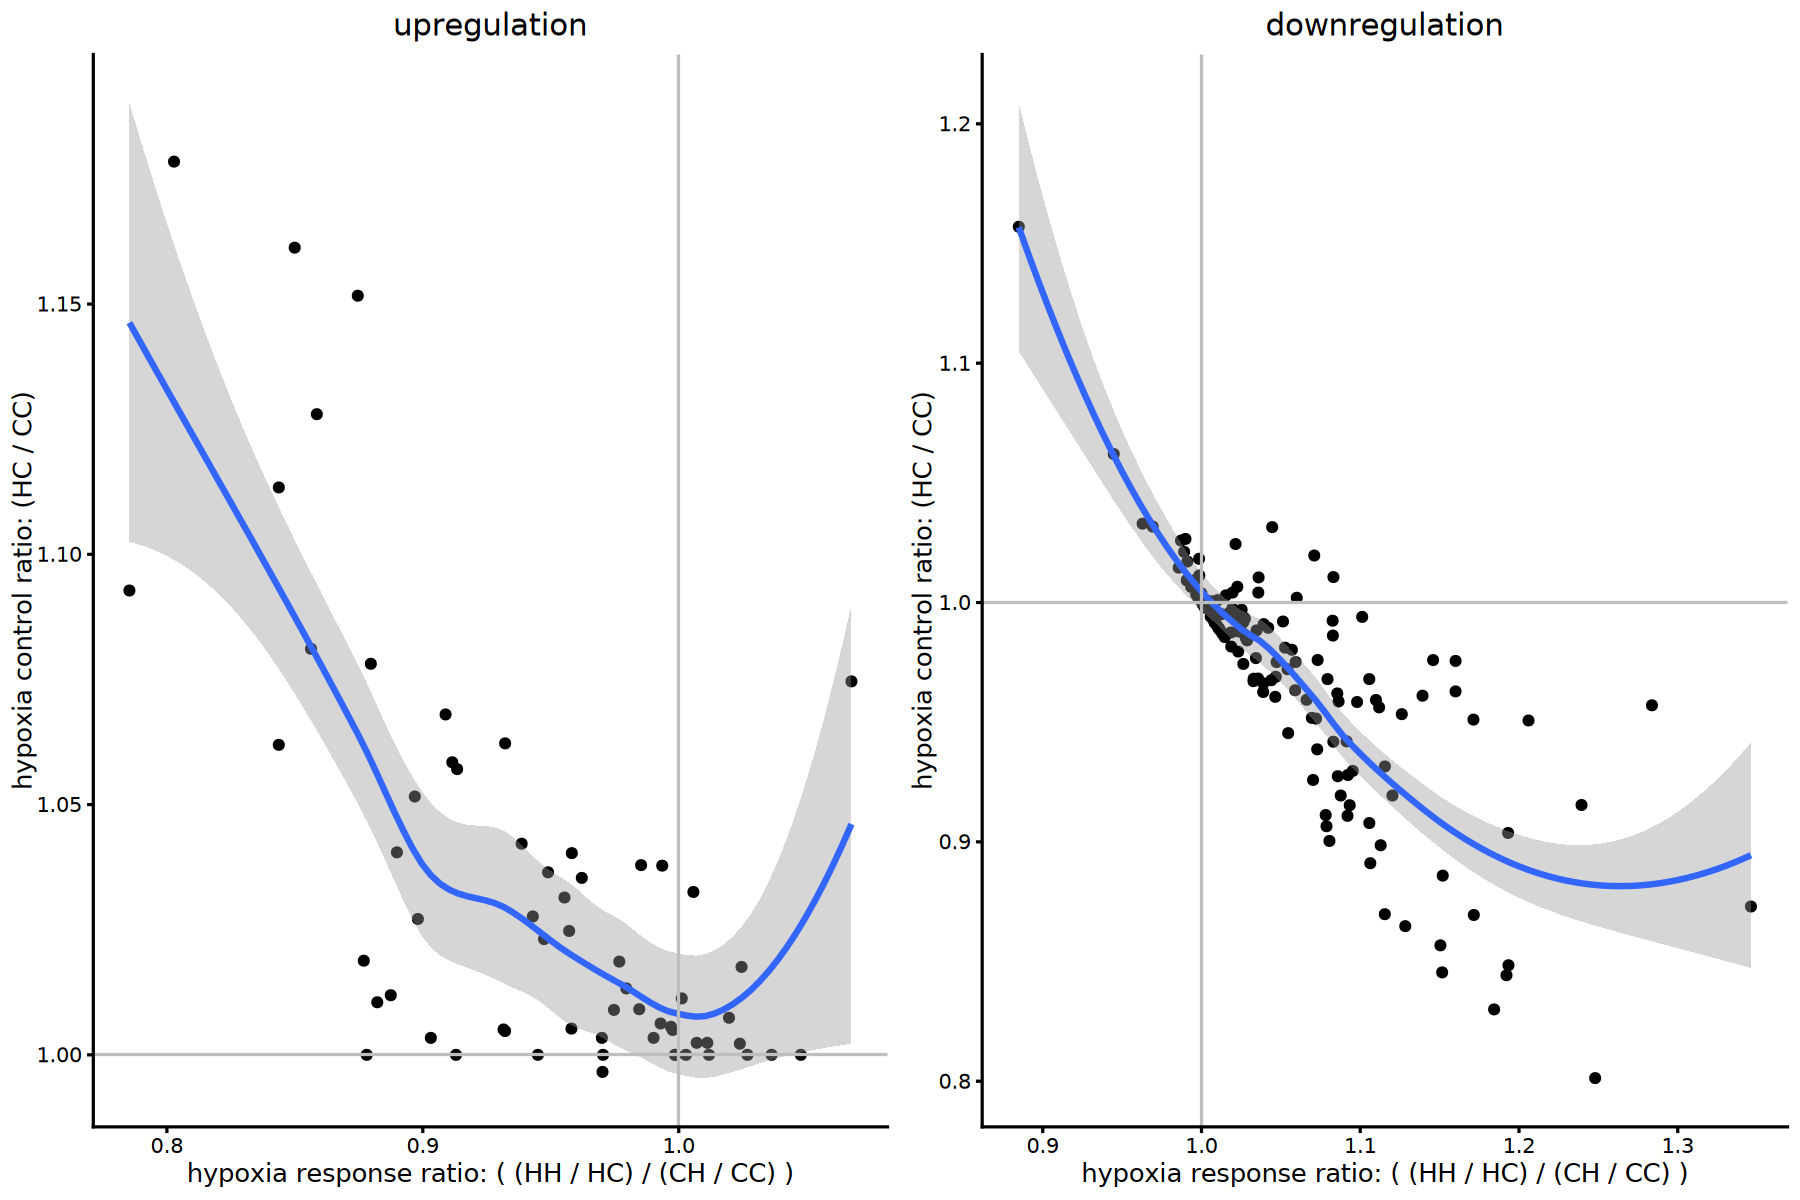

In [28]:
options(repr.plot.width=15, repr.plot.height=10)

plot_grid(hyp.UP.plot, hyp.DOWN.plot)

i'm actually not sure if i did the down-regulated genes correctly

#### WARM

In [29]:
warm.UP.plot <- ggplot(warm.vsd_UP, aes(x = x.axis, y = y.axis)) +
geom_point() + 
geom_hline(yintercept = 1, color = 'grey') + 
geom_vline(xintercept = 1, color = 'grey') +
labs(x = 'warm response ratio: ( (WW / WC) / (CW / CC) )',
     y = 'warm control ratio: (WC / CC)',
    title = 'upregulation') + 
theme_classic(base_size = 15) +
theme(plot.title = element_text(hjust = .5)) 

In [30]:
warm.DOWN.plot <- ggplot(warm.vsd_DOWN, aes(x = x.axis, y = y.axis)) +
geom_point() + 
geom_hline(yintercept = 1, color = 'grey') + 
geom_vline(xintercept = 1, color = 'grey') +
labs(x = 'warm response ratio: ( (WW / WC) / (CW / CC) )',
     y = 'warm control ratio: (WC / CC)',
    title = 'downregulation') + 
theme_classic(base_size = 15) +
theme(plot.title = element_text(hjust = .5)) 

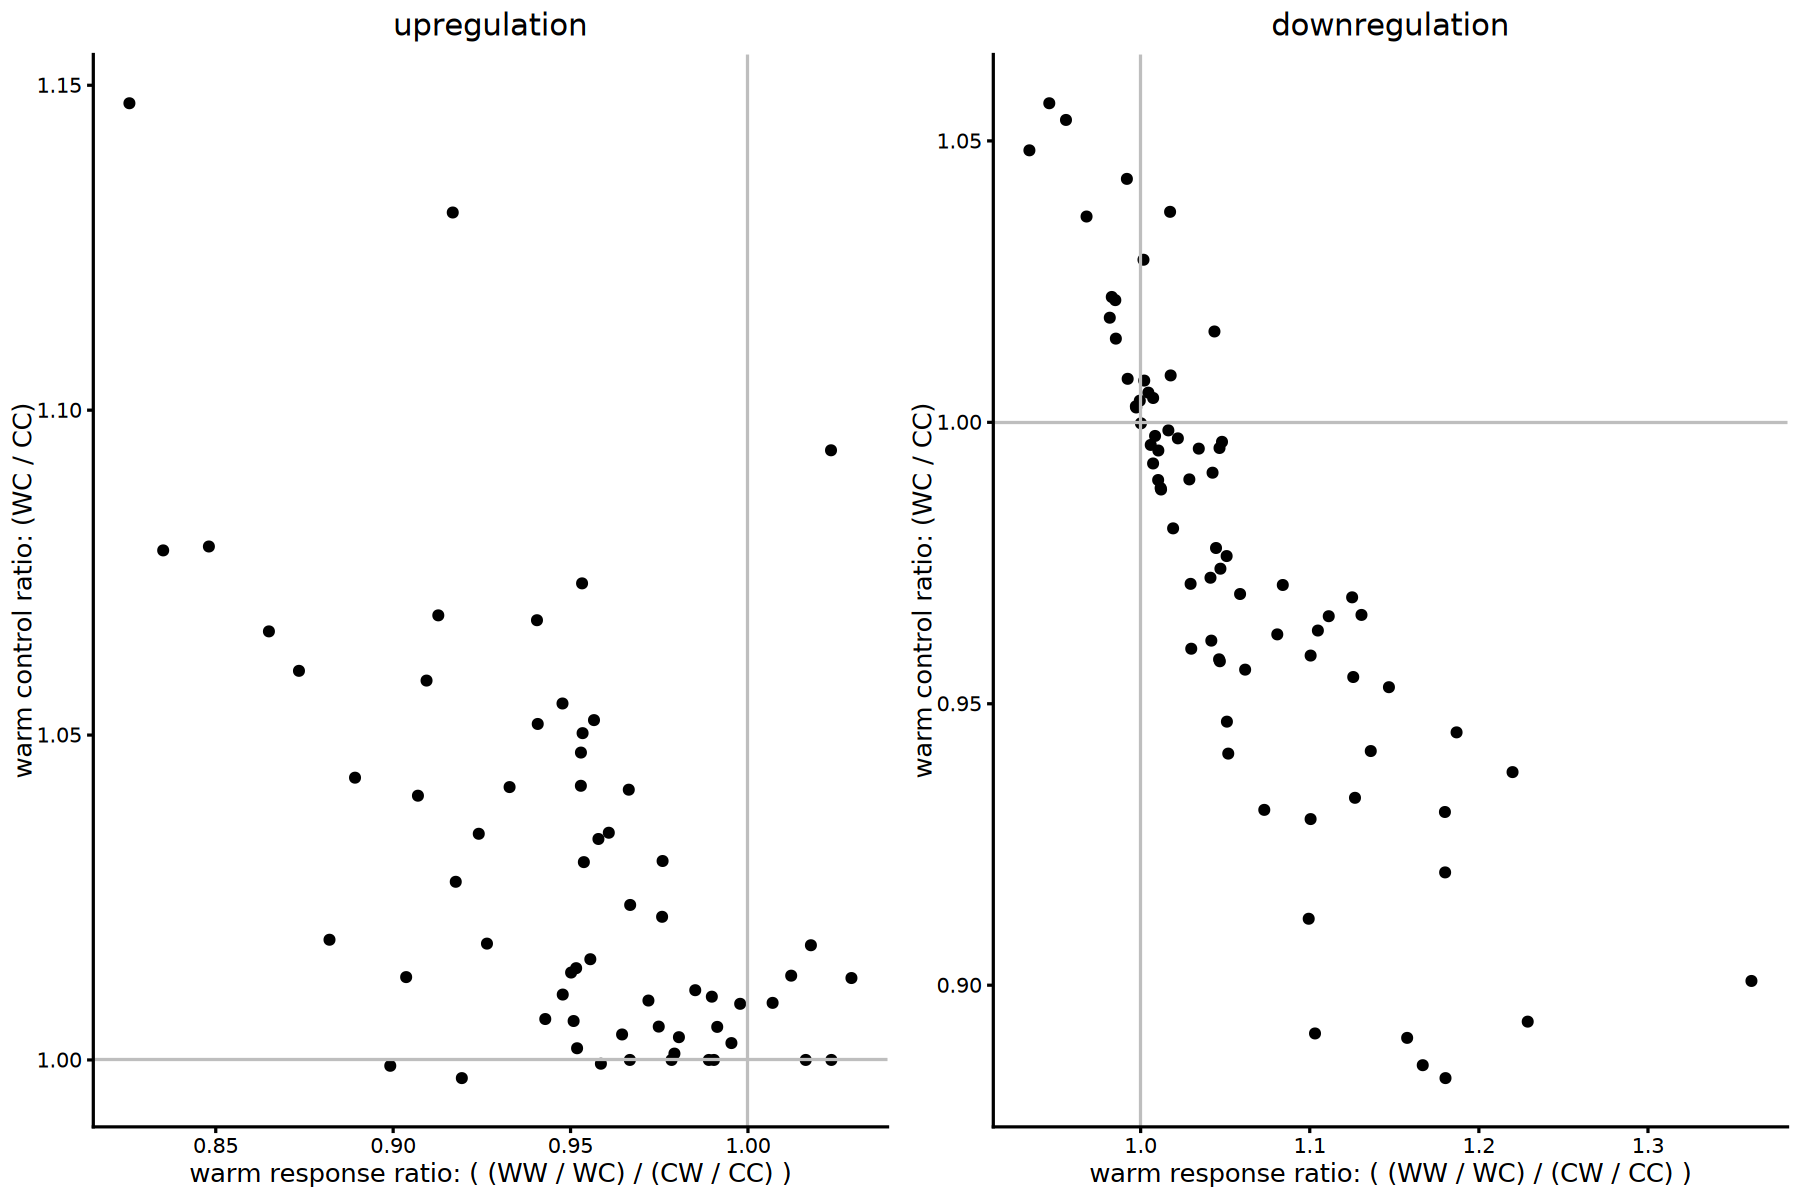

In [31]:
options(repr.plot.width=15, repr.plot.height=10)

plot_grid(warm.UP.plot, warm.DOWN.plot)

#### BOTH

In [32]:
both.UP.plot <- ggplot(both.vsd_UP, aes(x = x.axis, y = y.axis)) +
geom_point() + 
geom_hline(yintercept = 1, color = 'grey') + 
geom_vline(xintercept = 1, color = 'grey') +
labs(x = 'both response ratio: ( (BB / BC) / (CB / CC) )',
     y = 'both control ratio: (BC / CC)',
    title = 'upregulation') + 
theme_classic(base_size = 15) +
theme(plot.title = element_text(hjust = .5)) 

In [33]:
both.DOWN.plot <- ggplot(both.vsd_DOWN, aes(x = x.axis, y = y.axis)) +
geom_point() + 
geom_hline(yintercept = 1, color = 'grey') + 
geom_vline(xintercept = 1, color = 'grey') +
labs(x = 'both response ratio: ( (BB / BC) / (CB / CC) )',
     y = 'both control ratio: (BC / CC)',
    title = 'downregulation') + 
theme_classic(base_size = 15) +
theme(plot.title = element_text(hjust = .5)) 

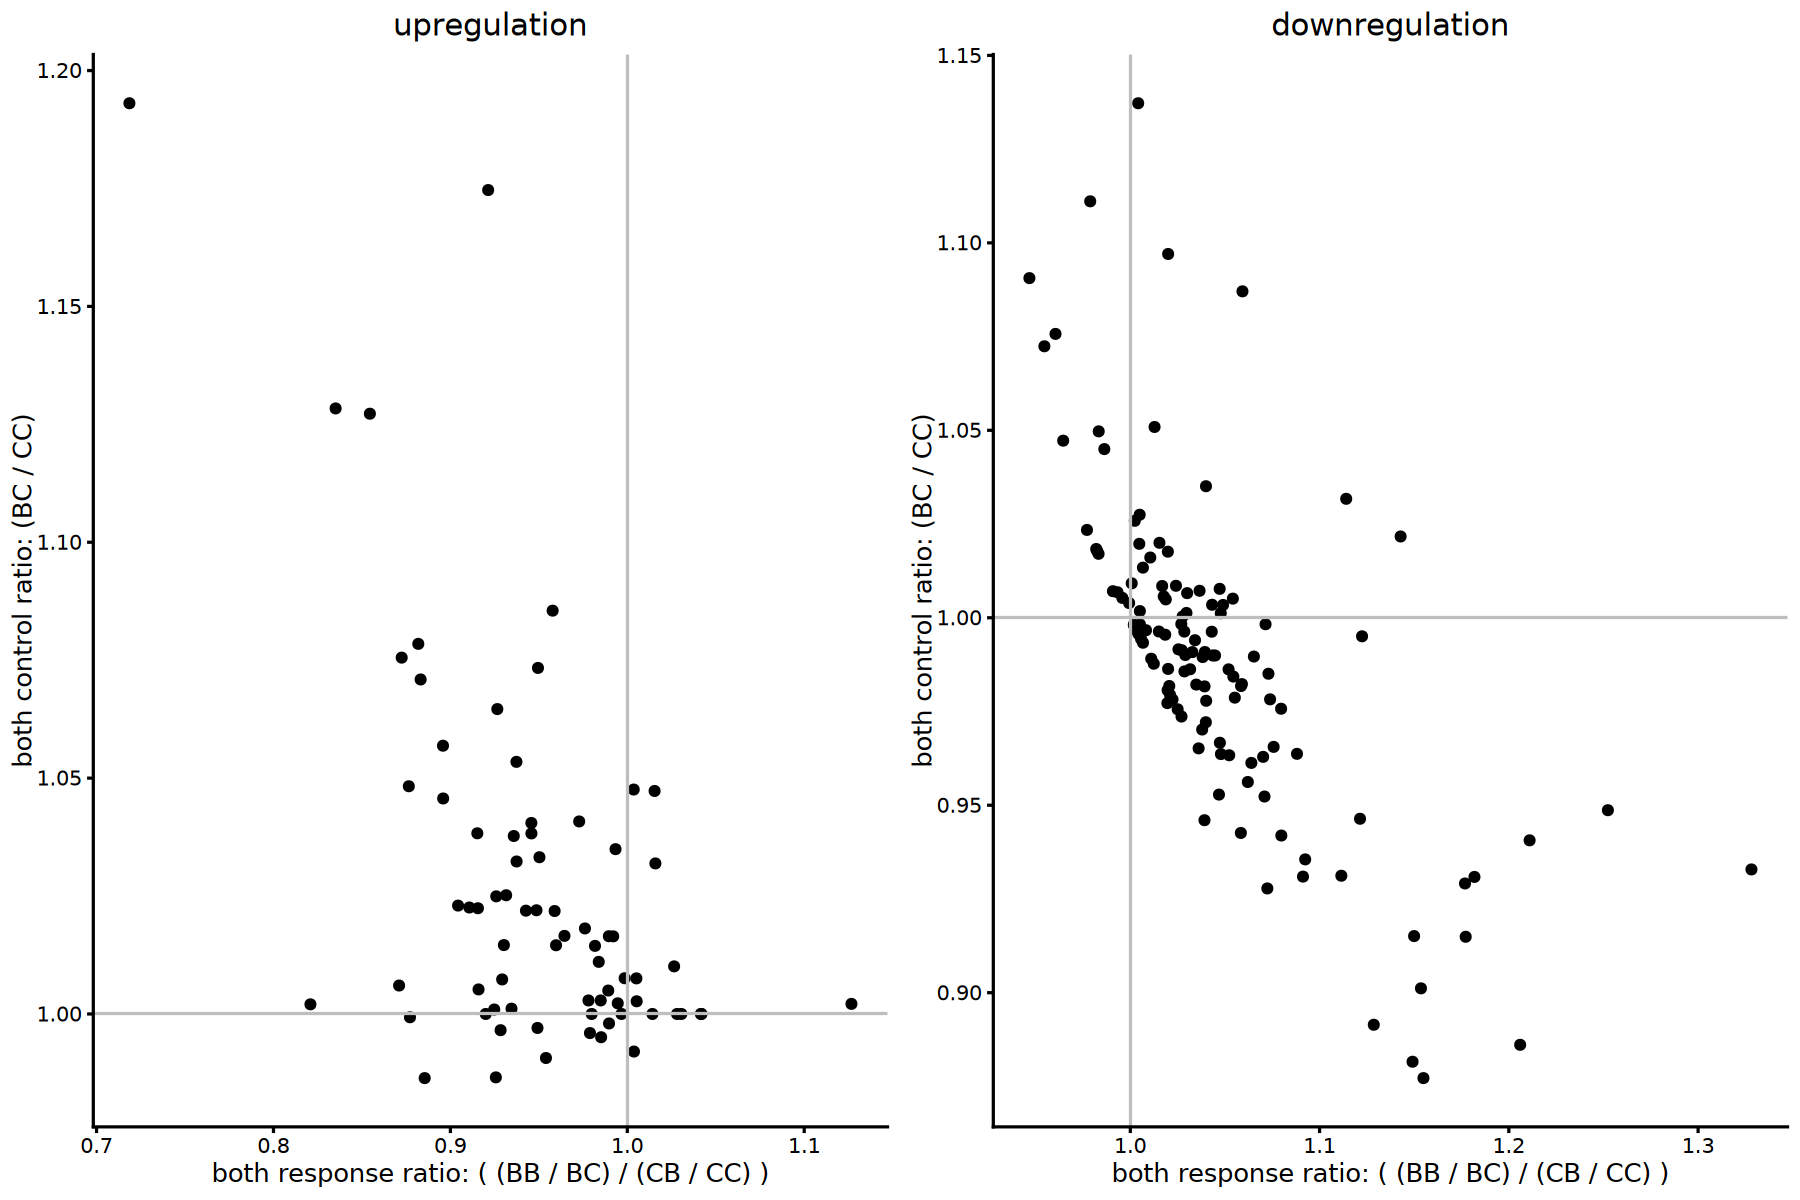

In [34]:
options(repr.plot.width=15, repr.plot.height=10)

plot_grid(both.UP.plot, both.DOWN.plot)

it's interesting that for all of these, there's more of a 'spread' for the downregulated genes - i think in all of these comparisons, there are more DEGs that are down-regulated than up-regulated, so maybe that's it??

I also, again, need to think more about the downregulation calculation

### mean vst expression for frontloaded genes
following Gurr et al 2022

In [35]:
### HYPOXIA 
## UPREGULATED

# filter for up-regulated frontloaded genes
fl.hyp.up <- hyp.vsd_UP %>%
filter(x.axis < 1 & y.axis > 1)
dim(fl.hyp.up) # 42 frontloaded genes

treatments <- c('control_control', 'hypoxic_control', 'control_hypoxic', 'hypoxic_hypoxic')

# pull those out of meta_vsd
fl.hyp.up <- meta_vsd[meta_vsd$Gene %in% fl.hyp.up$Gene,] %>%
filter(All_treatment == treatments)

hyp_mean.sd <- fl.hyp.up %>%
group_by(All_treatment) %>%
summarise(meanExp = mean(Expression),
         sdExp = sd(Expression)) %>%
separate(col = All_treatment, into = c('phase1', 'phase2'), sep = '_')

hyp_mean.sd

[1] 42 19

phase1,phase2,meanExp,sdExp
<chr>,<chr>,<dbl>,<dbl>
control,control,7.676525,0.2117786
control,hypoxic,8.083455,0.7565281
hypoxic,control,7.983738,0.7268098
hypoxic,hypoxic,7.933791,0.5716122


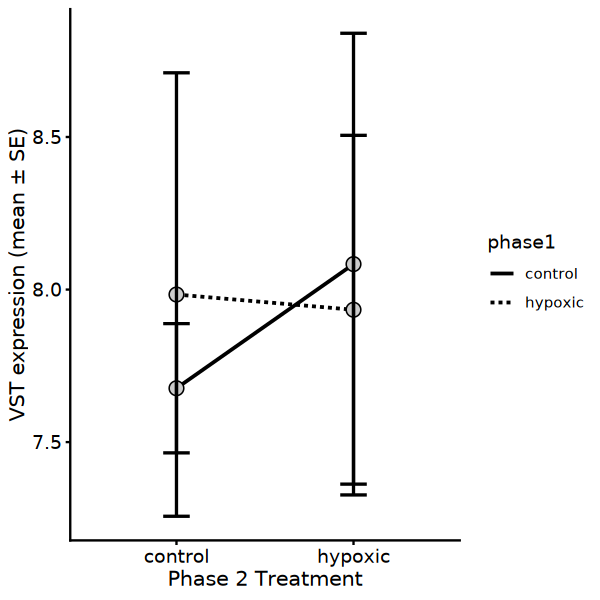

In [36]:
options(repr.plot.width=5, repr.plot.height=5)


ggplot(hyp_mean.sd, aes(x = phase2, y = meanExp, group = phase1)) +
  # lines
  geom_line(aes(linetype = phase1),
            linewidth = 0.8,
            color = "black") +
  # points
  geom_point(shape = 21,
             size = 3.5,
             fill = "grey80",
             color = "black") +
  # error bars
  geom_errorbar(aes(ymin = meanExp - sdExp, ymax = meanExp + sdExp),
                width = 0.15,
                linewidth = 0.7) +
  scale_linetype_manual(values = c("solid", "dashed")) +
  # labels
  labs(
    x = expression("Phase 2 Treatment"),
    y = "VST expression (mean ± SE)"
  ) +
  theme_classic() +
  theme(
    axis.text = element_text(size = 11),
    axis.title = element_text(size = 12)
  )


when the first exposure is control (solid line), the average expression increases when exposed to hypoxia in the phase 2

when the first exposure is hypoxic (dashed lines), the average expression is slightly reduced when the second exposure is hypoxia (reduced reaction)

but the sd overlap... 

In [37]:
### WARMING 
## UPREGULATED

# filter for up-regulated frontloaded genes
fl.warm.up <- warm.vsd_UP %>%
filter(x.axis < 1 & y.axis > 1)
dim(fl.warm.up) # 42 frontloaded genes

treatments <- c('control_control', 'warm_control', 'control_warm', 'warm_warm')

# pull those out of meta_vsd
fl.warm.up <- meta_vsd[meta_vsd$Gene %in% fl.warm.up$Gene,] %>%
filter(All_treatment == treatments)

warm_mean.sd <- fl.warm.up %>%
group_by(All_treatment) %>%
summarise(meanExp = mean(Expression),
         sdExp = sd(Expression)) %>%
separate(col = All_treatment, into = c('phase1', 'phase2'), sep = '_')

warm_mean.sd

[1] 48 19

phase1,phase2,meanExp,sdExp
<chr>,<chr>,<dbl>,<dbl>
control,control,7.746646,0.2963062
control,warm,8.409492,1.1835701
warm,control,8.223749,0.9283594
warm,warm,8.190861,0.8806353


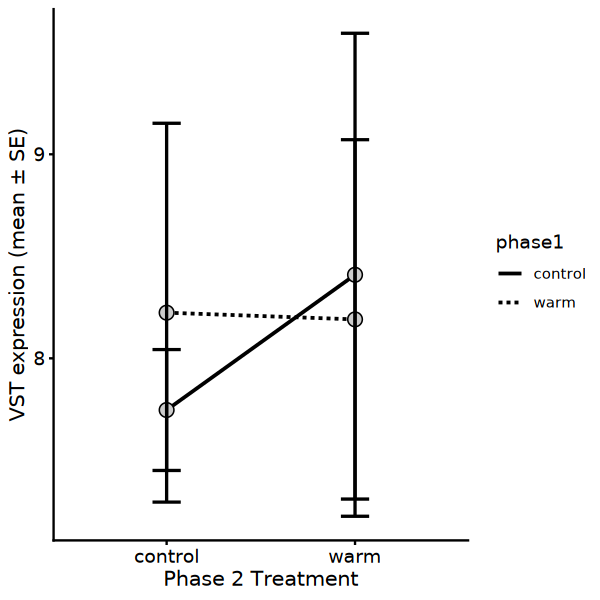

In [38]:
options(repr.plot.width=5, repr.plot.height=5)


ggplot(warm_mean.sd, aes(x = phase2, y = meanExp, group = phase1)) +
  # lines
  geom_line(aes(linetype = phase1),
            linewidth = 0.8,
            color = "black") +
  # points
  geom_point(shape = 21,
             size = 3.5,
             fill = "grey80",
             color = "black") +
  # error bars
  geom_errorbar(aes(ymin = meanExp - sdExp, ymax = meanExp + sdExp),
                width = 0.15,
                linewidth = 0.7) +
  scale_linetype_manual(values = c("solid", "dashed")) +
  # labels
  labs(
    x = expression("Phase 2 Treatment"),
    y = "VST expression (mean ± SE)"
  ) +
  theme_classic() +
  theme(
    axis.text = element_text(size = 11),
    axis.title = element_text(size = 12)
  )


when the first exposure is control (solid line), the expression increases in phase 2 warming stress

when the first exposure is warm (dashed line), the expression is *slightly* decreased, but really doesn't look like it changes, in phase 2 warming (reduced or maintained?? reaction)

sd bars overlap though ...

In [39]:
### BOTH 
## UPREGULATED

# filter for up-regulated frontloaded genes
fl.both.up <- both.vsd_UP %>%
filter(x.axis < 1 & y.axis > 1)
dim(fl.both.up) # 42 frontloaded genes

treatments <- c('control_control', 'both_control', 'control_both', 'both_both')

# pull those out of meta_vsd
fl.both.up <- meta_vsd[meta_vsd$Gene %in% fl.both.up$Gene,] %>%
dplyr::filter(All_treatment == treatments)

both_mean.sd <- fl.both.up %>%
group_by(All_treatment) %>%
summarise(meanExp = mean(Expression),
         sdExp = sd(Expression)) %>%
separate(col = All_treatment, into = c('phase1', 'phase2'), sep = '_')

both_mean.sd

[1] 49 19

Warning message:
“There were 2 warnings in `dplyr::filter()`.
The first warning was:
ℹ In argument: `All_treatment == treatments`.
Caused by warning in `==.default`:
! longer object length is not a multiple of shorter object length
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


phase1,phase2,meanExp,sdExp
<chr>,<chr>,<dbl>,<dbl>
both,both,8.303706,1.0178878
both,control,8.366178,0.9403913
control,both,8.480879,1.2517296
control,control,7.871402,0.5693405


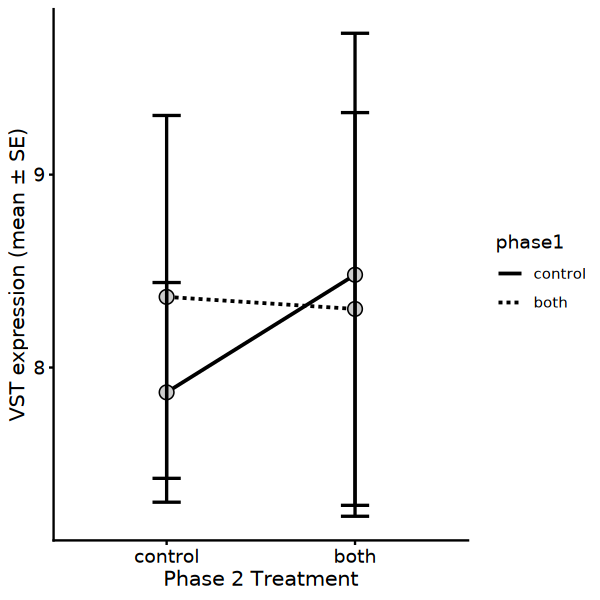

In [41]:
options(repr.plot.width=5, repr.plot.height=5)

# add factor for phase 1 to change order on plot
both_mean.sd$phase1 <- factor(both_mean.sd$phase1, c('control', 'both'))
both_mean.sd$phase2 <- factor(both_mean.sd$phase2, c('control', 'both'))


ggplot(both_mean.sd, aes(x = phase2, y = meanExp, group = phase1)) +
  # lines
  geom_line(aes(linetype = phase1),
            linewidth = 0.8,
            color = "black") +
  # points
  geom_point(shape = 21,
             size = 3.5,
             fill = "grey80",
             color = "black") +
  # error bars
  geom_errorbar(aes(ymin = meanExp - sdExp, ymax = meanExp + sdExp),
                width = 0.15,
                linewidth = 0.7) +
  scale_linetype_manual(values = c("solid", "dashed")) +
  # labels
  labs(
    x = expression("Phase 2 Treatment"),
    y = "VST expression (mean ± SE)"
  ) +
  theme_classic() +
  theme(
    axis.text = element_text(size = 11),
    axis.title = element_text(size = 12)
  )


when the first exposure is control (solid line), experiencing stress resulted in decreased average expression in phase 2 both stress exposure 

when the first exposure is both (dashed line), experiencing stress resulted in slightly increased avg. expression (so that's not frontloading ... right?)

again, sd bars overlap


it's interesting that control goes down in stress here, when that's the opposite case for warming and hypoxia